In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
#Reading CSV as a dataframe
df=pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,4633.299037
1,1971,5002.297935
2,1972,5485.175484
3,1973,6038.463248
4,1974,6810.514583
5,1975,7232.144346
6,1976,8296.131392
7,1977,8334.126170
8,1978,8481.967035
9,1979,8836.912681


In [3]:
#Forming training sets (Excluding years 1991,1999,2004), since I have to test for those
X_train=np.array(list(df['year'][:21])+list(df['year'][22:24])+list(df['year'][25:34])+list(df['year'][35:]))
y_train=np.array(list(df['per capita income (US$)'][:21])+
                 list(df['per capita income (US$)'][22:24])+
                 list(df['per capita income (US$)'][25:34])+
                 list(df['per capita income (US$)'][35:]))

In [4]:
X_train

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1992,
       1993, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [5]:
y_train

array([ 4633.299037,  5002.297935,  5485.175484,  6038.463248,
        6810.514583,  7232.144346,  8296.131392,  8334.12617 ,
        8481.967035,  8836.912681,  9589.96812 , 10668.39065 ,
       10853.43838 , 11650.53659 , 12024.32872 , 12252.95585 ,
       12716.89153 , 14208.80662 , 16314.28345 , 17660.72548 ,
       18072.6732  , 17646.08309 , 17109.58673 , 17603.31725 ,
       17933.82668 , 18544.75775 , 17856.67187 , 18815.02414 ,
       20221.38241 , 19835.39724 , 20466.17556 , 23973.42628 ,
       30432.05569 , 33972.2629  , 37378.48122 , 38680.48609 ,
       33989.17682 , 39654.52289 , 43568.71121 , 43899.25597 ,
       43910.46837 , 42273.8936  , 36409.18898 , 35463.19363 ])

Text(0, 0.5, 'Per Capita Income ($US)')

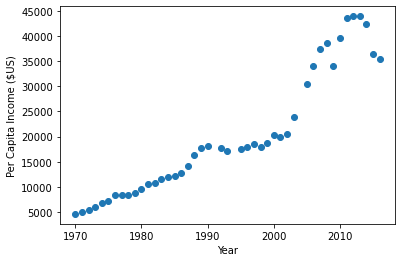

In [6]:
#Scatterplot of training dataset
plt.scatter(X_train,y_train)
plt.xlabel("Year")
plt.ylabel("Per Capita Income ($US)")

In [7]:
def LR(X,Y):
    if len(X.shape)==1:
        X = np.array(X).reshape(-1,1)
    else:
        X = np.array(X)
    n = X.shape[1]
    n_obs = X.shape[0]
    mat = np.zeros((n+1,n+1)) #forming an empty square matrix with n+1*n+1 dimmensions because if there are 
                                # n independant variables, there will be n+1 parameters

        #Forming the matrix
        #Separate cases are taken because i didnt add an additional columns on 1s in the arrays to account for that
        #one additional parameter
    for i in range(n+1):
        for j in range(n+1):
            if i==0 and j==0:
                mat[i,j] = n_obs
            elif i==0:
                mat[i,j] = np.sum(X.T[j-1])
            elif j==0:
                mat[i,j] = np.sum(X.T[i-1])
            else:
                mat[i,j] = np.dot(X.T[i-1],X.T[j-1])
    y = np.zeros((n+1,1))
    y[0] = np.sum(Y)
    for i in range(1,n+1):
        y[i] = np.dot(Y,X.T[i-1])
    #Eq obtained by partial differentiation.
    weights = np.dot(np.linalg.inv(mat),y)
    #weights is a matrix containing the final slope and intercept
    return weights

In [8]:
def predict(x,c,m):
    #function to take the slope and intercept and 
    y=m*x+c
    return y

In [9]:
#Training the data
w=LR(X_train,y_train)

In [10]:
print(w)
c=w[0]
m=w[1]

[[-1.63805786e+06]
 [ 8.32090362e+02]]


In [11]:
#Prediciting values

In [12]:
predict(1947,c,m)


array([-17977.92299627])

In [13]:
predict(1991,c,m)
#Actual Value: 18500.097690

array([18634.05292388])

In [14]:
predict(1999,c,m)
#Actual Value: 18815.024140

array([25290.77581846])

In [15]:
predict(2004,c,m)
#Actual Value: 26953.147150

array([29451.22762756])

In [16]:
predict(2069, c,m)


array([83537.10114597])

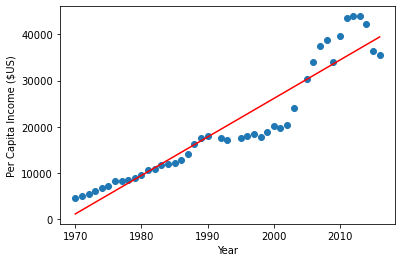

In [17]:
plt.scatter(X_train,y_train)
plt.xlabel("Year")
plt.ylabel("Per Capita Income ($US)")
plt.plot(df['year'],w[0]+w[1]*df['year'], c='r')

In [18]:
#Low accuracy in few of the cases because the given data does not exactly fit a linear shape.
#This is the best accuracy I can get from the given data using Linear Regression
# Since we see the plot is curving upwards, using polynomial regression of higher order 
#  (Quadratic or cubic) would result in a better accuracy 